In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/468a7b445d2027581fd2adf18d99ec0f036a8872/titanic-training-data.csv")

In [3]:
median1=df['Age'].median()

In [4]:
df['Age'].replace(np.nan,median1,inplace=True)

In [5]:
df=df.drop(['Cabin'],axis=1)

In [6]:
mode1=df['Embarked'].mode().values[0]

In [7]:
df['Embarked'].replace(np.nan,mode1,inplace=True)

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df=df.drop(['PassengerId'],axis=1)

In [11]:
df=df.drop(['Ticket'],axis=1)

In [12]:
df=df.drop(['Fare'],axis=1)

In [13]:
df=df.drop(['Name'],axis=1)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,28.0,1,2,S
889,1,1,male,26.0,0,0,C


In [15]:
dummies=pd.get_dummies(df[['Sex','Embarked']],columns=['Sex','Embarked'])

In [16]:
dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [17]:
df=pd.concat([df,dummies],axis=1)

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
1,1,1,female,38.0,1,0,C,1,0,1,0,0
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,0,1,0,0,1
887,1,1,female,19.0,0,0,S,1,0,0,0,1
888,0,3,female,28.0,1,2,S,1,0,0,0,1
889,1,1,male,26.0,0,0,C,0,1,1,0,0


In [19]:
df.drop(['Sex'],axis=1,inplace=True)

In [20]:
df

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,S,0,1,0,0,1
1,1,1,38.0,1,0,C,1,0,1,0,0
2,1,3,26.0,0,0,S,1,0,0,0,1
3,1,1,35.0,1,0,S,1,0,0,0,1
4,0,3,35.0,0,0,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,0,1,0,0,1
887,1,1,19.0,0,0,S,1,0,0,0,1
888,0,3,28.0,1,2,S,1,0,0,0,1
889,1,1,26.0,0,0,C,0,1,1,0,0


In [21]:
df.drop(['Embarked'],axis=1,inplace=True)

In [22]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [23]:
median2=df['Age'].median()

In [24]:
median2

28.0

In [25]:
x=df.drop(['Survived'],axis=1)

In [26]:
y=df[['Survived']]

In [27]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [28]:
reg=LogisticRegression()

In [29]:
reg.fit(x_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
reg.score(x_train,y_train)

0.8105939004815409

In [31]:
reg.score(x_test,y_test)

0.7798507462686567

In [35]:
predictions=reg.predict(x_test)

In [37]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1,0])

In [38]:
f_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict 1","Predict 0"]])

In [39]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<AxesSubplot:>

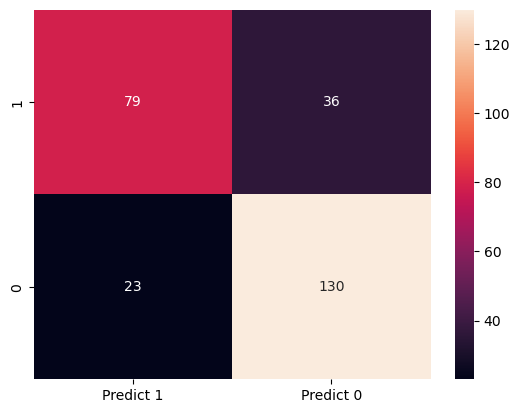

In [40]:
sns.heatmap(f_cm,annot=True,fmt='g')

In [ ]:
clf=SVC(kernel='linear')

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag=BaggingClassifier(n_estimators=5,base_estimator=dtree)

In [ ]:
bag.fit(x_train,y_train)

In [ ]:
bag.score(x_train,y_train)


In [ ]:
bag.score(x_test,y_test)